# Mandatory Assignment #01

Applied Machine Learning and Data Engineering in Business Context KAN-CDSCV1008U

Andrea Perez Lopez
Susana Morala Miguel
Maria Magdalena Gomez
Laura Peciulyte

Data set was scraped from airlinequality.com and contains text-based reviews in addition to reviewers' ratings of available dimensions on the website.
Source data: https://www.kaggle.com/datasets/joelljungstrom/128k-airline-reviews?datasetId=3415709

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [10]:
data = pd.read_csv('AirlineReviews.csv')
data.shape

(129455, 22)

In [11]:
#Check the data
data.head(3), data.tail(3),

(        Aircraft  AirlineName      CabinType      DateFlown  \
 0            NaN  AB Aviation  Economy Class  November 2019   
 1           E120  AB Aviation  Economy Class      June 2019   
 2  Embraer E120   AB Aviation  Economy Class      June 2019   
 
               DatePub  EntertainmentRating  FoodRating  GroundServiceRating  \
 0  11th November 2019                    0           4                    4   
 1      25th June 2019                    0           1                    1   
 2      25th June 2019                    0           1                    1   
 
    OriginCountry  OverallScore  ...                Route SeatComfortRating  \
 0    Netherlands           9.0  ...     Moroni to Moheli                 4   
 1  UnitedKingdom           1.0  ...    Moroni to Anjouan                 2   
 2  UnitedKingdom           1.0  ...  Anjouan to Dzaoudzi                 2   
 
   ServiceRating         Slug                         Title    TravelType  \
 0             5  ab-avia

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [39]:
# Statistical summary of the numerical data
data.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
count,129455.000000,129455.000000,129455.000000,125124.000000,129455.000000,129455.000000,129455.000000,129455.000000
mean,1.557190,1.989077,1.652010,4.556408,2.470202,2.689622,2.637527,0.453926
std,1.751076,1.774512,1.740252,3.498833,1.620262,1.774499,1.628808,1.078274
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
# Check the number missing values in the whole data
data.isna().sum().sort_values(ascending=False)

Aircraft               93031
TripVerified           69947
Route                  38630
DateFlown              38462
TravelType             38309
OverallScore            4331
CabinType               3018
OriginCountry           1678
Review                   824
Title                      4
GroundServiceRating        0
Recommended                0
AirlineName                0
FoodRating                 0
SeatComfortRating          0
ServiceRating              0
Slug                       0
EntertainmentRating        0
DatePub                    0
ValueRating                0
WifiRating                 0
unique_id                  0
dtype: int64

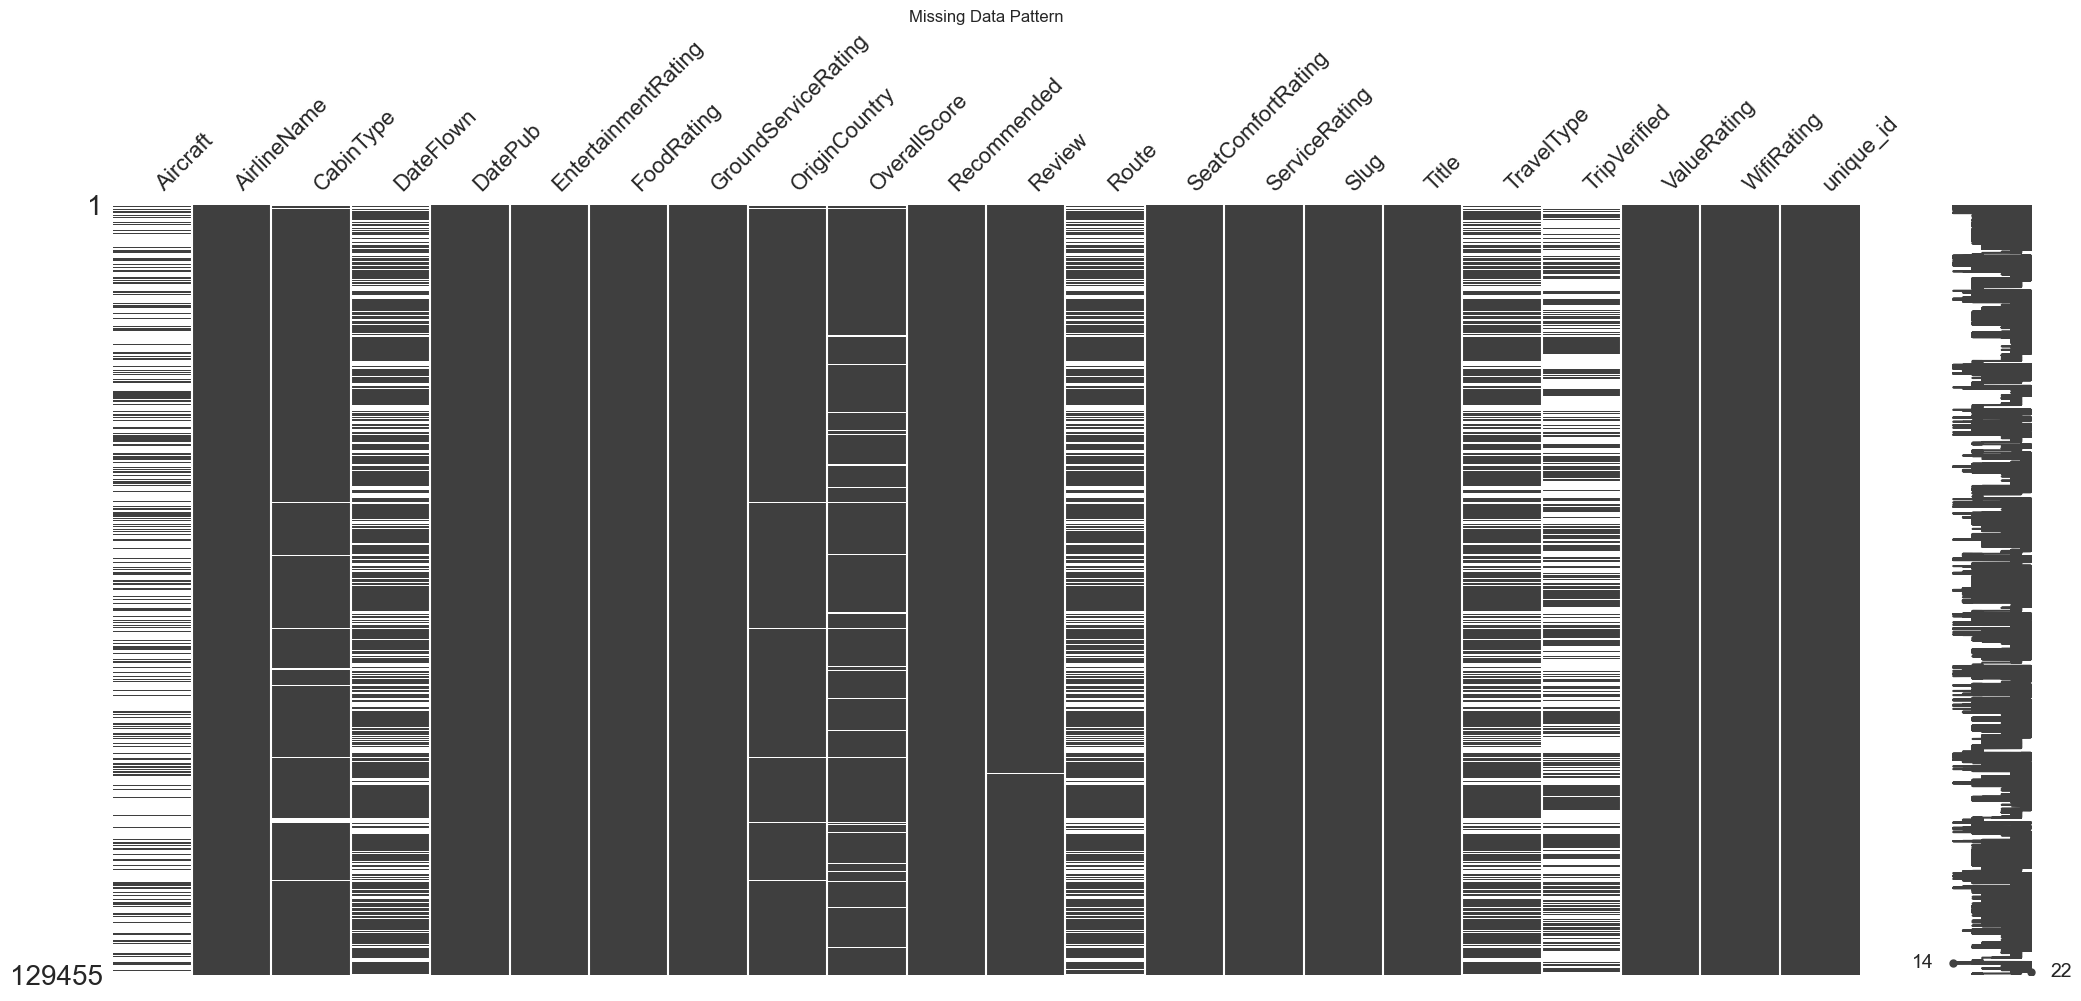

In [26]:
# Create a pattern graph from the missing values
msno.matrix(data)
plt.title('Missing Data Pattern')
plt.show()

In [14]:
#Check for duplicated values
data.duplicated().sum()

0

In [40]:
#Check the columns with the most missing values
data[['TripVerified', 'Aircraft']].isna().sum()

TripVerified    69947
Aircraft        93031
dtype: int64

In [28]:
# Check the number of unique values in each column
data.nunique()

Aircraft                 3633
AirlineName               547
CabinType                   4
DateFlown                 111
DatePub                  5200
EntertainmentRating         6
FoodRating                  6
GroundServiceRating         6
OriginCountry             202
OverallScore               10
Recommended                 2
Review                 128425
Route                   51401
SeatComfortRating           6
ServiceRating               6
Slug                      548
Title                   70975
TravelType                  4
TripVerified                6
ValueRating                 6
WifiRating                  6
unique_id              129455
dtype: int64

The "TripVerified" column contains 6 unique values, which appears to be incorrect. In reality, it should only have two distinct values: 'verified' (Trip Verified) or 'not verified.

In [42]:
data['TripVerified'].unique()

array(['Trip Verified', nan, 'Not Verified',
       'Trip Verified,Trip Verified', 'NotVerified',
       'Not Verified,Not Verified',
       'Chicago to Colorado Springs. Not Verified'], dtype=object)

In [43]:
# Replace the incorrect values
replacement_mapping = {
    'Trip Verified,Trip Verified': 'Trip Verified',
    'NotVerified': 'Not Verified',
    'Not Verified,Not Verified': 'Not Verified',
    'Chicago to Colorado Springs. Not Verified': 'Not Verified'
}
# Replace values in the 'TripVerified' column
data['TripVerified'] = data['TripVerified'].replace(replacement_mapping)

In [48]:
data['TripVerified'].value_counts()

Trip Verified    45441
Not Verified     14067
Name: TripVerified, dtype: int64

The assumption is to analyze only the verified trips because they are more likely to provide accurate and credible information about the airline experience. Verified trips typically involve reviewers whose identities or booking details have been confirmed by the platform or airline, reducing the likelihood of fake or unreliable reviews.

In [50]:
data_clean=data[data['TripVerified']=='Trip Verified']
data_clean.shape

(45441, 22)

In [53]:
data_clean.nunique()

Aircraft                1954
AirlineName              459
CabinType                  4
DateFlown                 83
DatePub                 1998
EntertainmentRating        6
FoodRating                 6
GroundServiceRating        6
OriginCountry            181
OverallScore              10
Recommended                2
Review                 45311
Route                  27259
SeatComfortRating          6
ServiceRating              6
Slug                     460
Title                  38170
TravelType                 4
TripVerified               1
ValueRating                6
WifiRating                 6
unique_id              45441
dtype: int64

In [65]:
data_clean['CabinType'].value_counts()

Economy Class      38369
Business Class      4810
Premium Economy     1554
First Class          708
Name: CabinType, dtype: int64

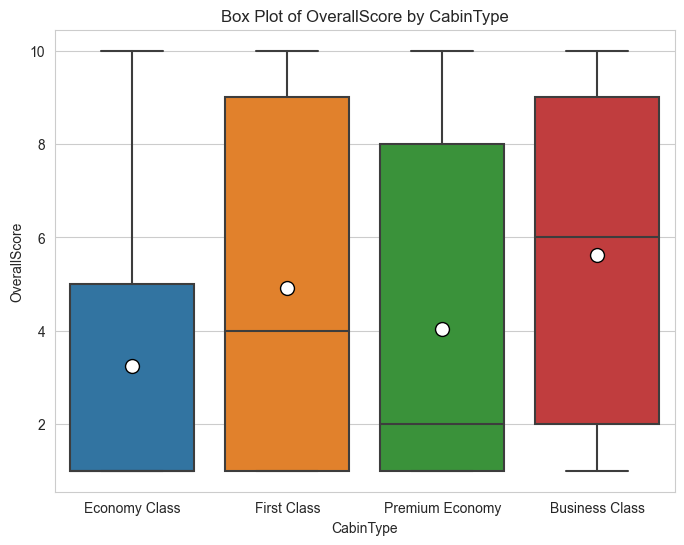

In [66]:
plt.figure(figsize=(8, 6))  # Set the figure size
custom_marker = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10)
sns.boxplot(x='CabinType', y='OverallScore', showmeans=True, meanprops=custom_marker,  data=data_clean)
# Set plot labels and title
plt.xlabel('CabinType')
plt.ylabel('OverallScore')
plt.title('Box Plot of OverallScore by CabinType')
plt.show()

In [67]:
data_clean['TravelType'].value_counts()

Solo Leisure      17577
Couple Leisure    11187
Family Leisure     9516
Business           7159
Name: TravelType, dtype: int64

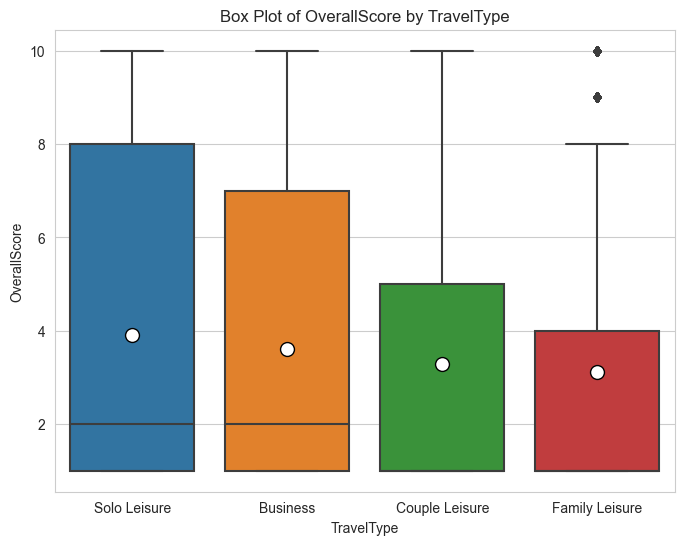

In [68]:
plt.figure(figsize=(8, 6))  # Set the figure size

sns.boxplot(x='TravelType', y='OverallScore', showmeans=True, meanprops=custom_marker, data=data_clean)

# Set plot labels and title
plt.xlabel('TravelType')
plt.ylabel('OverallScore')
plt.title('Box Plot of OverallScore by TravelType')
plt.show()

It calculates the weighted average of the 'OverallScore' for each airline, using the number of reviews as the weight. This approach was adopted because a simple average was misleadingly ranking airlines with a few positive reviews as the best.

In [82]:
data_clean['AirlineName'].value_counts()

American Airlines    2427
United Airlines      1848
Spirit Airlines      1826
Frontier Airlines    1504
Delta Air Lines      1152
                     ... 
Air Rarotonga           1
Maya Island Air         1
Air Cote d'Ivoire       1
SVG Air                 1
Kam Air                 1
Name: AirlineName, Length: 459, dtype: int64

In [83]:
# Calculate the average overall score for each airline
airline_scores = data_clean.groupby('AirlineName')['OverallScore'].mean()
# Group by airline and count the number of reviews
review_counts = data_clean['AirlineName'].value_counts()
# Calculate the weighted average for each airline
weighted_averages = (airline_scores * review_counts) / review_counts.sum()
# Find the top 5 airlines by weighted average
top_5_airlines_indices = weighted_averages.sort_values(ascending=False).head(5).index
# Extract their average scores
top_5_average_scores = airline_scores.loc[top_5_airlines_indices]

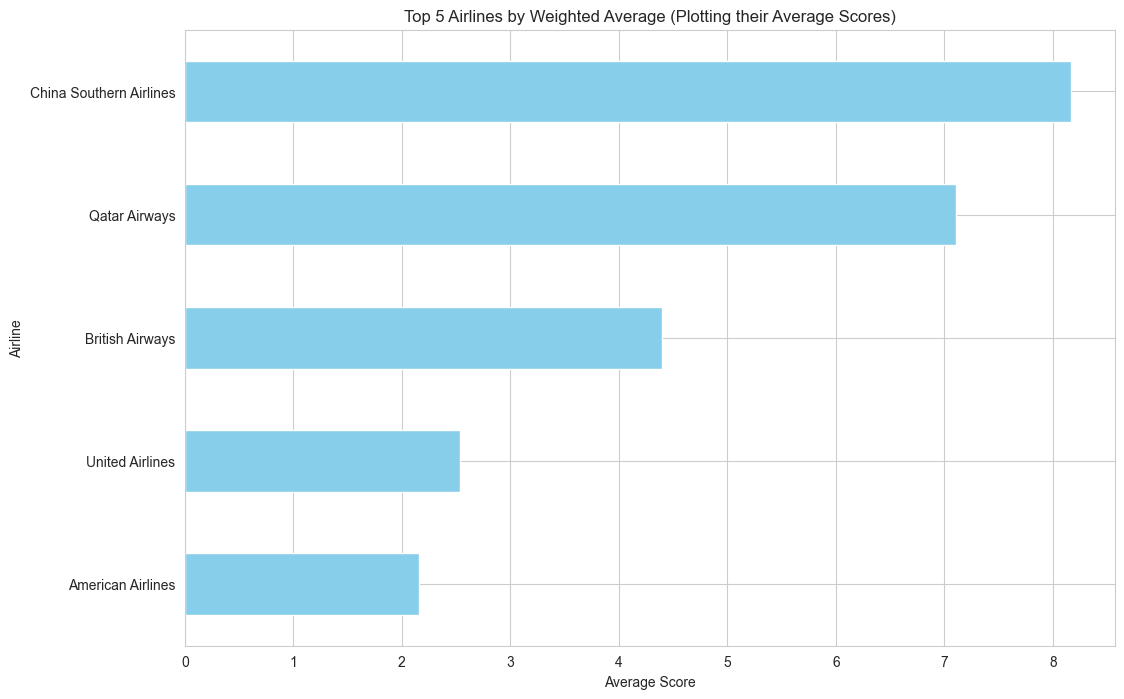

In [84]:
plt.figure(figsize=(12, 8))
top_5_average_scores.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 5 Airlines by Weighted Average (Plotting their Average Scores)')
plt.xlabel('Average Score')
plt.ylabel('Airline')
plt.show()